## Simple Time Series Prediction model with Prophet
### Scott Hendrickson


In [1]:
import pandas as pd

from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

from matplotlib import pyplot as plt
%matplotlib inline

## Canonical Example for Prophet Website

In [2]:
!ls ../data
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')
df.head()

example_wp_log_peyton_manning.csv


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


### Many options, but a basic prophet model on daily data does the obvious seasonality detection

In [3]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.23    0.00333027       229.371           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7993.56   0.000129511       136.478     0.02731           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7997.17   0.000734911       157.438      0.8599      0.8599      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       7998.51   8.30685e-05       244.937   2.117e-07       0.001      442  LS failed, Hessian reset 
     399       8000.57   8.73339e-05       65.5818           1           1      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8002.44   0.000319089    

57   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       8003.78     0.0047489       442.915      0.2226      0.2226      784   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     603       8003.81   0.000799967       414.813   1.139e-05       0.001      820  LS failed, Hessian reset 
     699       8004.62   5.85863e-05       178.881      0.4416      0.4416      939   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     748       8004.75   4.62273e-05       116.152   7.253e-07       0.001     1055  LS failed, Hessian reset 
     793        8004.8   6.11982e-07       60.2887      0.4229      0.4229     1115   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


### Even has a utility to create a data frame with historical and future predictions

In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.211542,7.529499,8.916162
3266,2017-01-16,8.536553,7.825084,9.302427
3267,2017-01-17,8.323968,7.614735,9.044567
3268,2017-01-18,8.156621,7.467116,8.871164
3269,2017-01-19,8.168561,7.460873,8.886678


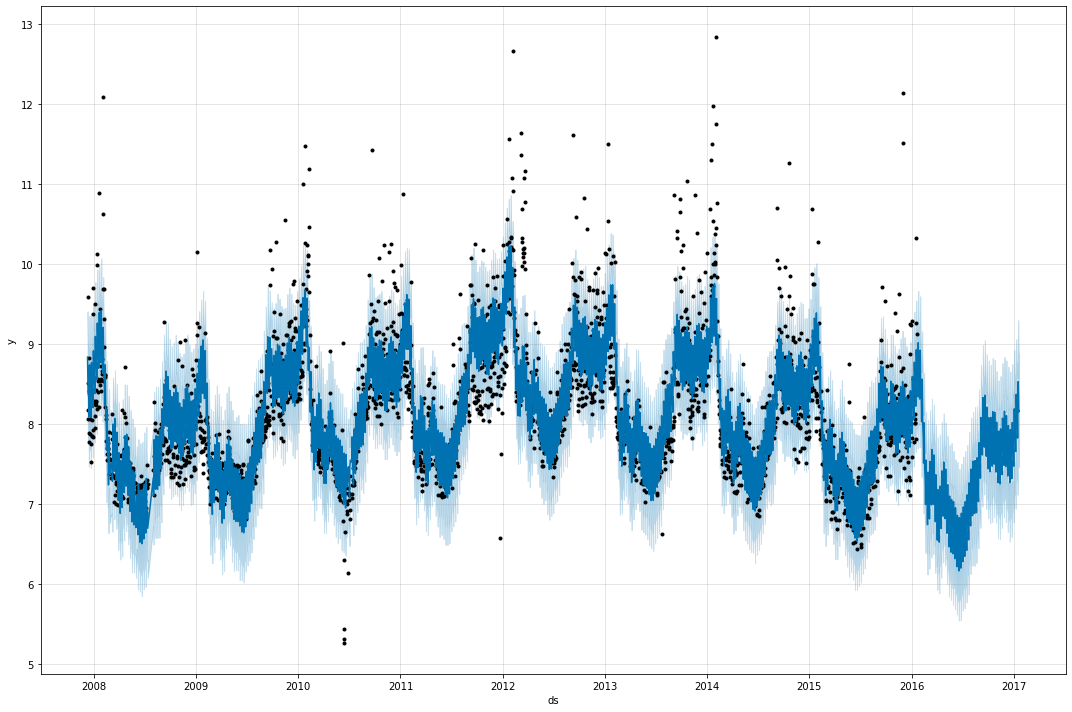

In [6]:
fig1 = m.plot(forecast, figsize=[15,10])

/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


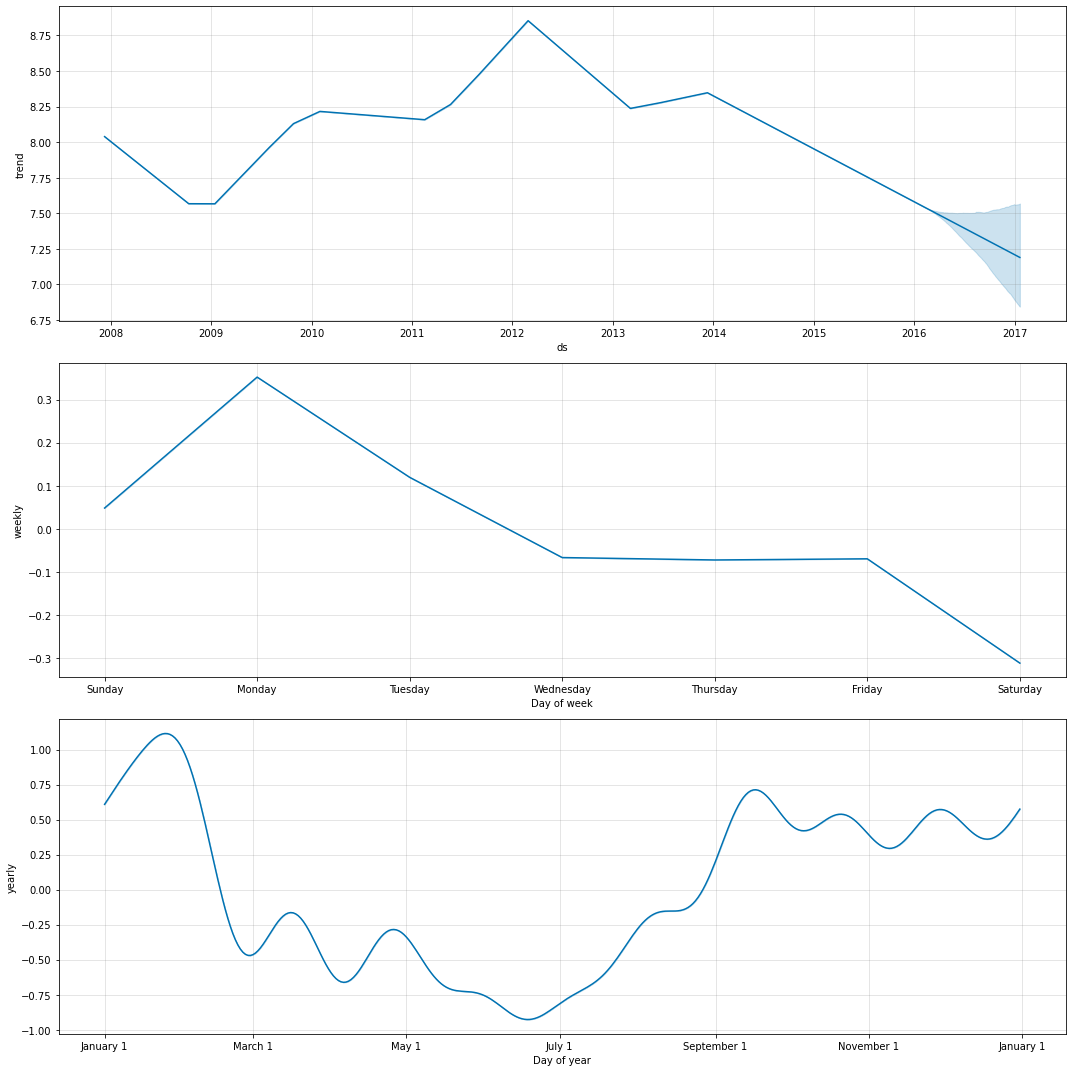

In [7]:
fig2 = m.plot_components(forecast, figsize=[15,15])

## Get an idea of prediction quality using cross-validation

In [8]:
df_cv = cross_validation(m, initial='730 days', period='365 days', horizon = '365 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2010-01-21 00:00:00 and 2015-01-20 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.24359
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2181.57    0.00133337       126.975           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       2181.94    0.00040129       101.097   6.514e-06       0.001      221  LS failed, Hessian reset 
     199          2182   0.000105255       58.4127      0.2895           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       2182.01   8.76607e-05       81.3712   9.823e-07       0.001      316  LS failed, Hessian reset 
     245       2182.02   1.26928e-07       94.2907      0.4518      0.4518      375   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.22773
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3100.08    0.00102471       97.7299      0.6064     0.06064      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3104.19   0.000283442       83.3078           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3105.54    0.00904179       250.233           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307        3105.7    7.5034e-05       107.668    8.71e-07       0.001      428  LS failed, Hessian reset 
     399       3105.91    5.7818e-05       72.7128   9.893e-07       0.001      584  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     450       3

/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.377
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4097.37     0.0112577       120.813           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       4100.48   0.000606582        128.35   8.586e-06       0.001      246  LS failed, Hessian reset 
     199       4101.69   0.000433961        98.835      0.4014      0.4014      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       4102.34   0.000514748       75.5488   3.526e-06       0.001      458  LS failed, Hessian reset 
     299       4102.39   0.000316496       78.3797           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       4103.21   0.000126892       234.941     7.1e-07       0.001      601  LS failed, Hessian reset

/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.4378
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4981.1    0.00320034       391.178      0.7876      0.7876      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4987.52   0.000456107         74.29           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       4988.02   5.61161e-05       112.314   4.036e-07       0.001      351  LS failed, Hessian reset 
     299       4988.11   9.69585e-05       71.7786       3.996      0.3996      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       4988.24   5.89419e-05       120.097   4.651e-07       0.001      475  LS failed, Hessian reset 
     378       4988.37   1.25963e-05       62.9849   1.943e-07       0.001      582  LS failed, Hessian rese

/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.0208
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5936.58     0.0278517       872.587           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5944.67     0.0113557       289.273      0.4054      0.4054      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5946.14   8.48255e-05       178.101   5.711e-07       0.001      295  LS failed, Hessian reset 
     299       5949.38     0.0484681       138.814           1           1      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5951.81      0.001178        193.98      0.5345           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     473       5952.42   5.13206e-05    

/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.0767
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6968.37    0.00562895       210.031           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6977.82   0.000515846       172.895     0.03174       0.542      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6980.5   0.000894468       143.424      0.6228      0.6228      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       6980.88   0.000295854       141.674   2.903e-06       0.001      469  LS failed, Hessian reset 
     399       6981.08   7.73204e-05       58.6332      0.7546      0.7546      520   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        6981.7     0.0039164    

/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/scott/.cache/pypoetry/virtualenvs/timeseriesflaskdeploy-H6P_mrM0-py3.8/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [9]:
df_p = performance_metrics(df_cv)
print(len(df))
df_p.head(10)

2905


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.684697,0.827464,0.673570,0.075369,0.071405,0.074733,0.445988
1,38 days,0.675927,0.822148,0.666389,0.074818,0.070816,0.074140,0.447222
2,39 days,0.658578,0.811528,0.655099,0.073953,0.070381,0.073207,0.452778
3,40 days,0.642200,0.801374,0.644220,0.073081,0.067831,0.072309,0.465278
4,41 days,0.621774,0.788527,0.631069,0.071915,0.066178,0.071142,0.486111
5,42 days,0.607756,0.779587,0.620081,0.070788,0.065656,0.070085,0.500000
6,43 days,0.597747,0.773141,0.614032,0.070214,0.065745,0.069602,0.502315
7,44 days,0.590464,0.768416,0.609214,0.069803,0.065745,0.069261,0.504630
8,45 days,0.580852,0.762137,0.602973,0.069278,0.065656,0.068768,0.511574
9,46 days,0.632260,0.795148,0.607972,0.069605,0.064449,0.069385,0.518519


# Create Model

In [10]:
import requests
import json
import pandas as pd

In [11]:
base_url = "http://localhost:5000"
base_url = "http://192.168.127.8/ts-model"
base_url = "http://127.0.0.1"

In [12]:
res = requests.get(base_url + "/version")
print(res.json())

{'version': '0.1.0', 'date': '2022-06-08T03:39'}


In [13]:
res = requests.get(base_url + "/example")
print(res.json())

{'size': [2905, 2], 'data': [['2007-12-10', '9.59076113897809'], ['2007-12-11', '8.51959031601596'], ['2007-12-12', '8.18367658262066'], ['2007-12-13', '8.07246736935477'], ['2007-12-14', '7.8935720735049'], ['2007-12-15', '7.78364059622125'], ['2007-12-16', '8.41405243249672'], ['2007-12-17', '8.82922635473185'], ['2007-12-18', '8.38251828808963'], ['2007-12-19', '8.06965530688617'], ['2007-12-20', '7.87929148508227'], ['2007-12-21', '7.76174498465891'], ['2007-12-22', '7.52940645783701'], ['2007-12-23', '8.38526052015541'], ['2007-12-24', '8.62011072542292'], ['2007-12-25', '7.85243908535751'], ['2007-12-26', '7.85399308722424'], ['2007-12-27', '8.0519780789023'], ['2007-12-28', '7.92660259918138'], ['2007-12-29', '7.83834331555712'], ['2007-12-30', '9.70314458114435'], ['2007-12-31', '9.38597294061934'], ['2008-01-01', '8.29379960884682'], ['2008-01-02', '8.43468076984177'], ['2008-01-03', '8.26204284396694'], ['2008-01-04', '8.10681603894705'], ['2008-01-05', '7.95014988765202'], [

<AxesSubplot:xlabel='ds'>

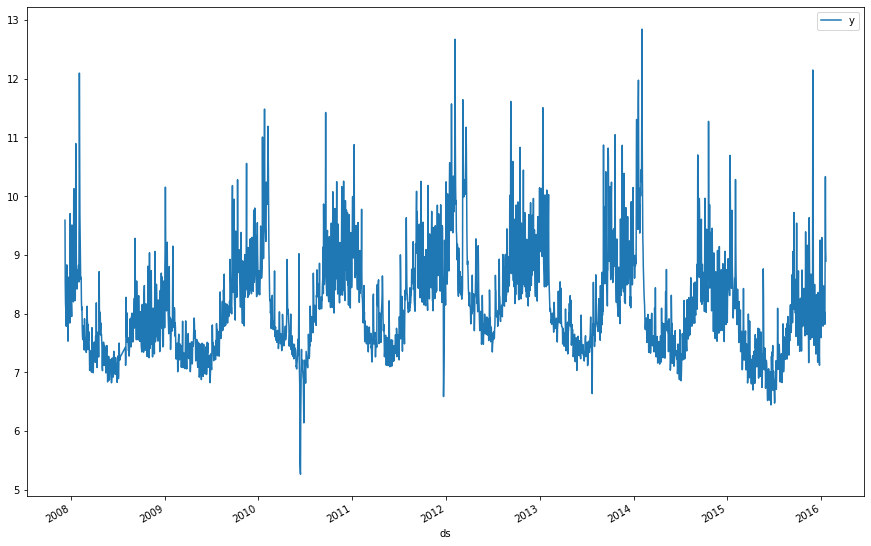

In [14]:
dft = pd.DataFrame(res.json()["data"], columns=res.json()["header"])
dft["ds"] = pd.to_datetime(dft['ds'])
dft["y"] = dft['y'].astype(float)
dft.plot("ds", "y", figsize=[15,10])

In [15]:
tr = requests.post(base_url + "/train", json = res.json())
print(tr)
print(tr.json())

<Response [200]>
{'size': [2905, 2], 'training_time': 1.3962445259094238}


In [19]:
xv = requests.get(base_url + "/validation")
print(xv)

<Response [200]>


In [17]:
pr = requests.post(base_url + "/predict", json = {"size": 180, "data":[]})

['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']


<AxesSubplot:xlabel='ds'>

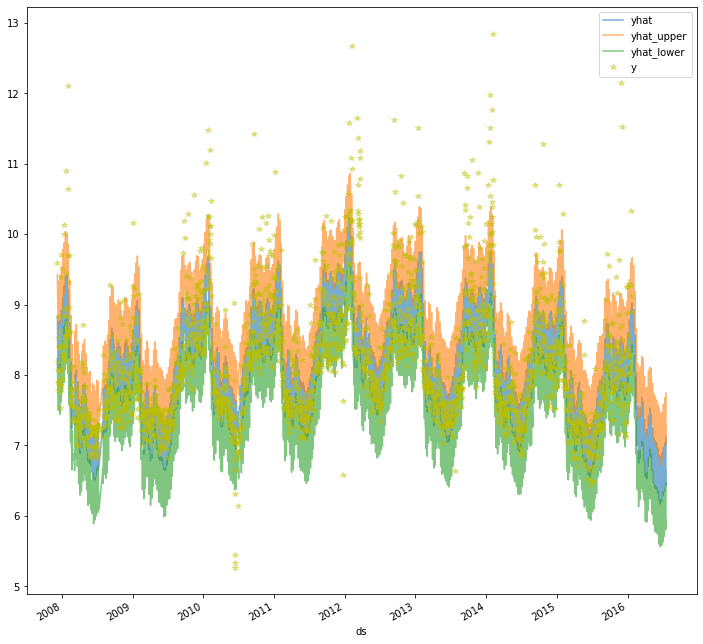

In [18]:
print(pr.json()["header"])
dfr = pd.DataFrame(pr.json()["data"], columns=pr.json()["header"])
dfr["ds"] = pd.to_datetime(dfr['ds'])
ax = dfr.plot("ds",["yhat", "yhat_upper", "yhat_lower"], figsize=[12,12], alpha=0.6)
dft.plot("ds", "y", ax=ax, style="y*", alpha=0.4)